In [2]:
using Plots
using JSON
using DataFrames

default(framestyle=:box)

In [3]:
function load_step_metrics(name)
    data = JSON.parsefile("../logs/$name.json")
    DataFrame(data["step_metrics"])
end

load_step_metrics (generic function with 1 method)

## Profile GPU kernel

In [ ]:
df = load_step_metrics("gpu_spawn")

display(first(df))

plot(xlabel="Pedestrian count", ylabel="Process time per step / s")
plot!(df.active_ped_count, [df.time_spawn, df.time_calc_state, df.time_calc_state_kernel], labels=["spawn" "calc_state" "calc_state_kernel"])

In [ ]:
savefig("output/profile_gpu_kernel.svg");

## Evaluate time between spawn implementations

In [ ]:
items = ["gpu_spawn", "spawn_reserve", "spawn_has_capacity", "gpu_release"]

plot(xlabel="Pedestrian count", ylabel="Process time per step / s", ylim=[0.0, 0.01], xlim=[0.0, 2.5e4])

for item in items
    df = load_step_metrics(item)
    plot!(df.active_ped_count, df.time_spawn, label=item)
end

plot!()

## Evaluate performance between backends

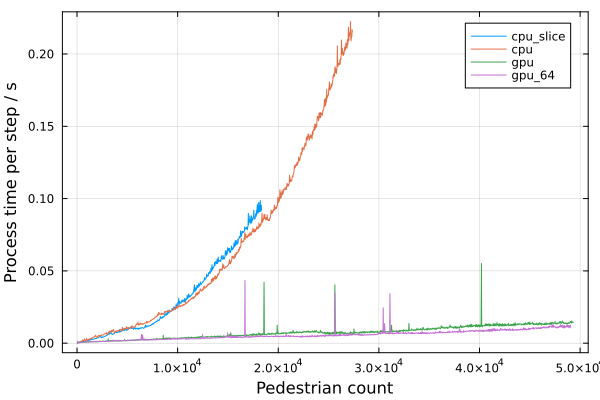

In [13]:
items = ["cpu_slice", "cpu", "gpu", "gpu_64"]

plot(xlabel="Pedestrian count", ylabel="Process time per step / s")

for item in items
    df = load_step_metrics(item)
    plot!(df.active_ped_count, df.time_calc_state, label=item)
end

plot!()

In [ ]:
items = ["gpu", "gpu_release", "box"]

plot(xlabel="Pedestrian count", ylabel="Process time per step / s", ylim=[0.0, 0.01])

for item in items
    df = load_step_metrics(item)
    plot!(df.active_ped_count, df.time_calc_state, label=item)
end

plot!()

In [ ]:
items = ["gpu", "gpu_loop_sw", "gpu_load_only", "gpu_release"]

plot(xlabel="Pedestrian count", ylabel="Process time per step / s", ylim=[0.0, 0.01])

for item in items
    df = load_step_metrics(item)
    plot!(df.active_ped_count, df.time_calc_state_kernel, label=item)
end

plot!()

In [11]:
savefig("output/grid_vs_nogrid.svg");